# Experimenting different plots for Covid dataset and national aforestation Grant dataset
## Rererence  [1]: https://api.covid19india.org/csv/latest/state_wise_daily.csv
## Rererence  [2]: https://visualize.data.gov.in/?inst=c21789e6-f6c3-4178-a9a1-a6ac9e7d1abc#

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

url = 'https://api.covid19india.org/csv/latest/state_wise_daily.csv'
raw_data = pd.read_csv(url)

In [2]:
params = {'legend.fontsize': 20, 
          'legend.handlelength': 2, 
          'figure.figsize': [10, 12], 
          'figure.dpi': 120, 
          'axes.titlesize': 12, 
          'axes.labelsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'legend.fontsize': 10,
          'font.family': 'sans-serif'}

plt.rcParams.update(params)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=None, hspace=0.5)

<Figure size 1200x1440 with 0 Axes>

In [44]:
raw_data

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,03-Dec-20,2020-12-03,Recovered,42991,14,835,37,177,502,173,...,706,3232,8,1413,873,58,1696,433,3257,0
794,03-Dec-20,2020-12-03,Deceased,541,0,11,0,2,7,3,...,20,20,0,14,3,0,31,12,49,0
795,04-Dec-20,2020-12-04,Confirmed,36711,13,599,19,169,619,111,...,724,1934,47,1391,631,33,1951,618,3206,0
796,04-Dec-20,2020-12-04,Recovered,42359,14,913,36,121,605,161,...,643,3141,7,1426,802,68,2247,560,3215,0


# Scatter plot of Infected Indian Population

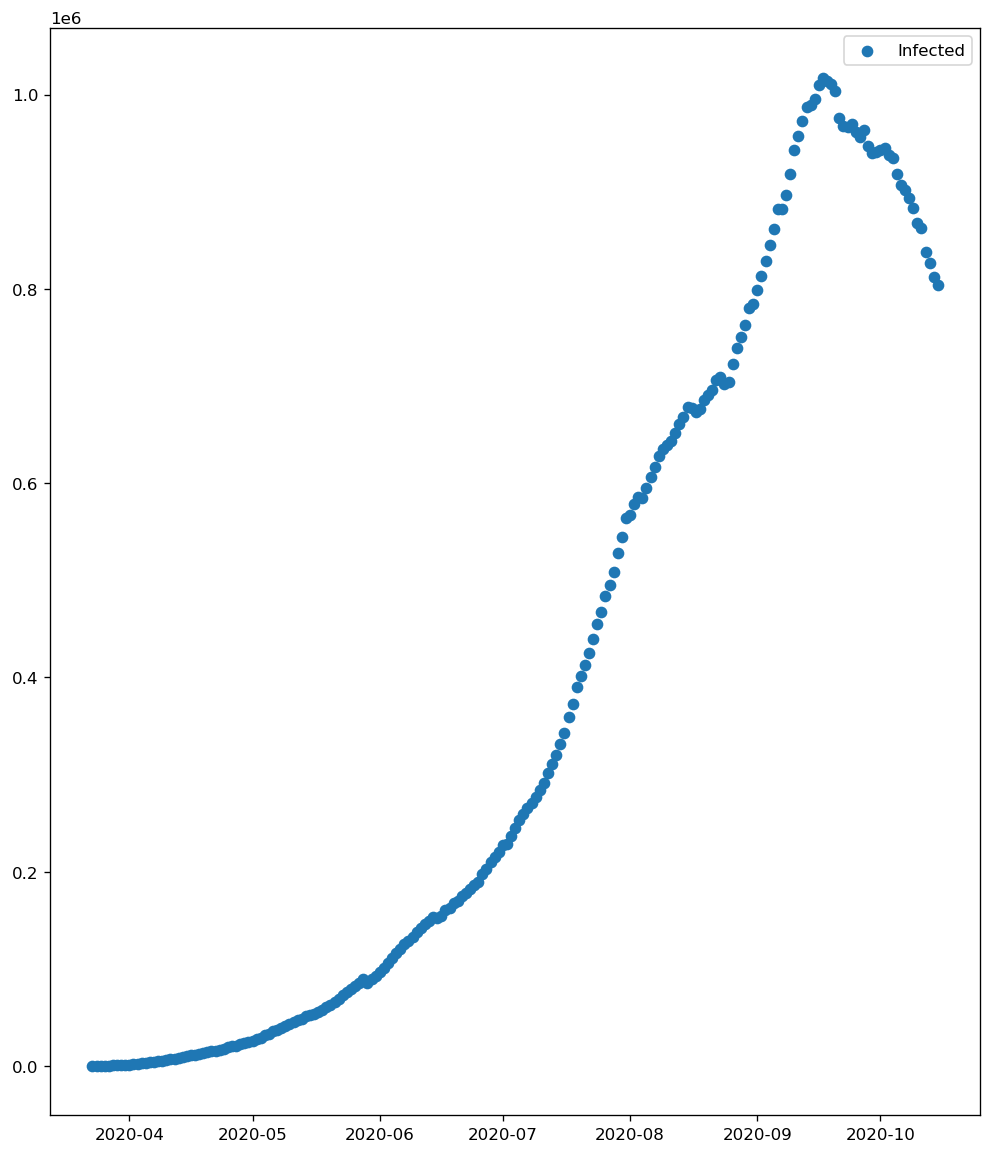

In [62]:
idx_s = (np.where(raw_data["Date"]=='23-Mar-20')[0])[0] #First date
idx_e = (np.where(raw_data["Date"]=='15-Oct-20')[0])[2] #Last date

daily_stats = raw_data['TT'].to_numpy()
daily_stats = daily_stats[idx_s:idx_e+1]
m = len(daily_stats)//3 #No. of days

dates = np.arange('2020-03-23', '2020-10-16', dtype='datetime64[D]')
I = np.zeros(m) #total infections
R = np.zeros(m) #total removed
S = np.zeros(m) #total susceptible
N = 1.3e9

for i in range(m):
  I_d = daily_stats[3*i] 
  R_d = daily_stats[3*i+1] + daily_stats[3*i+2]

  if i == 0:
    I[0] = I_d
    R[0] = R_d
    S[0] = N - I[0] - R[0]
  else:
    I[i] = I[i-1] + I_d - R_d
    R[i] = R[i-1] + R_d
    S[i] = S[i-1] - I_d

plt.title("Total number of infected person versus Date")
plt.xlabel("Dates")
plt.ylabel("Infecetd polulation")
plt.scatter(dates, I,label='Infected')
#plt.scatter(dates,R,label="Recovered")
#plt.scatter(dates,S,label="Susceptible")
plt.legend()
# font = {'family' : 'serif',
#         'weight' : 'normal',
#         'size'   : 18}

# matplotlib.rc('font', **font)
# plt.rc('axes', labelsize=28)
# fig, ax = plt.subplots(1, 1) # figsize=(15,20)
# ax.scatter(dates, I)
# ax.set_ylabel('$I$')
# ax.set_title('Infected Population')
# plt.setp(p,linewidth=2,ms=8)
# ax[1].set_title('Removed Population')
# ax[1].set_ylabel('$R$')
# ax[2].plot(dates, S,'go')
# ax[2].set_title('Susceptible Population')
# ax[2].set_ylabel('$S$')
# ax[2].set_xlabel('$Date$')
plt.show()

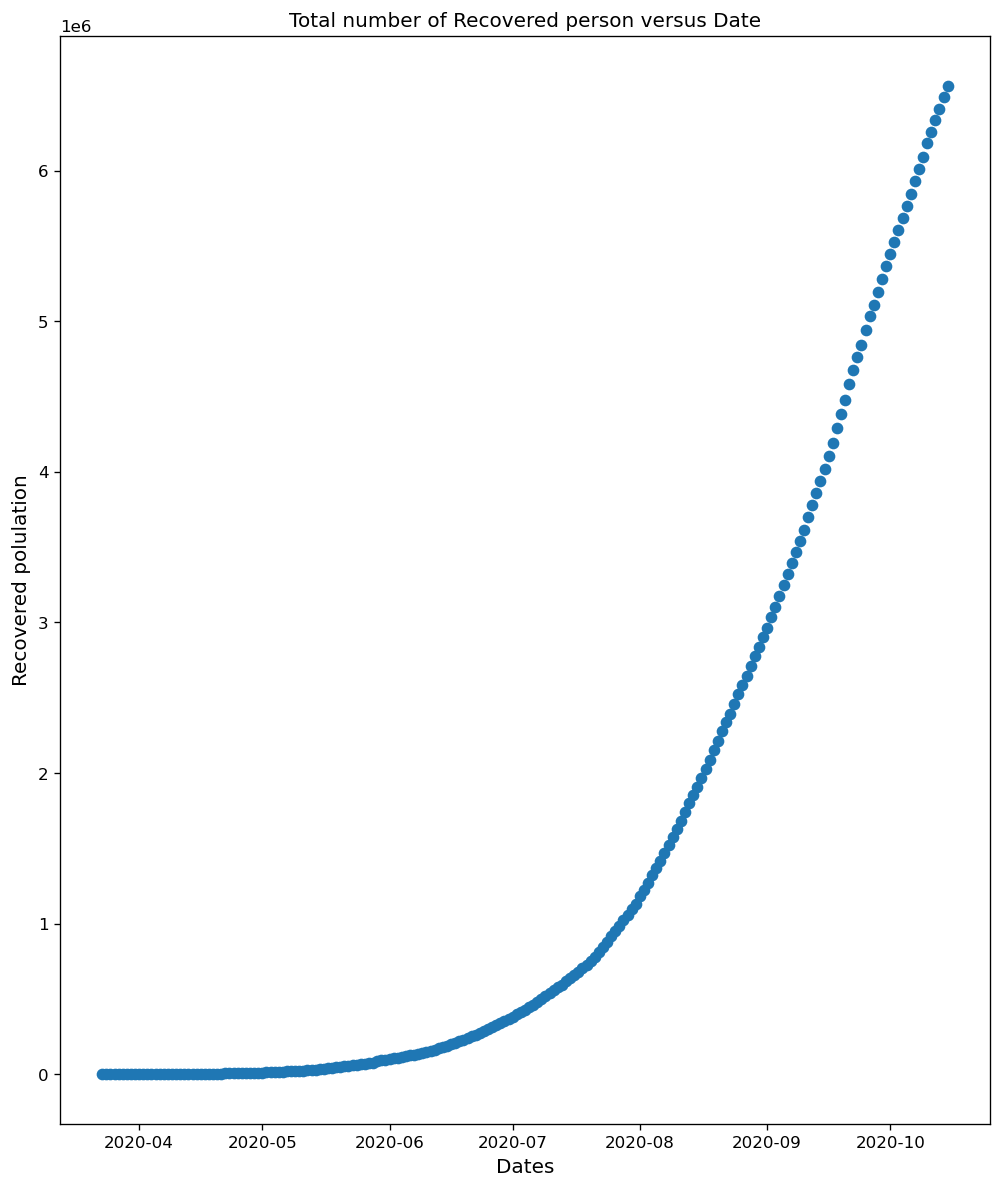

In [67]:
plt.title("Total number of Recovered person versus Date")
plt.xlabel("Dates")
plt.ylabel("Recovered polulation")
#plt.scatter(dates, I,label='Infected')
plt.scatter(dates,R,label="Recovered")
#plt.scatter(dates,S,label="Susceptible")

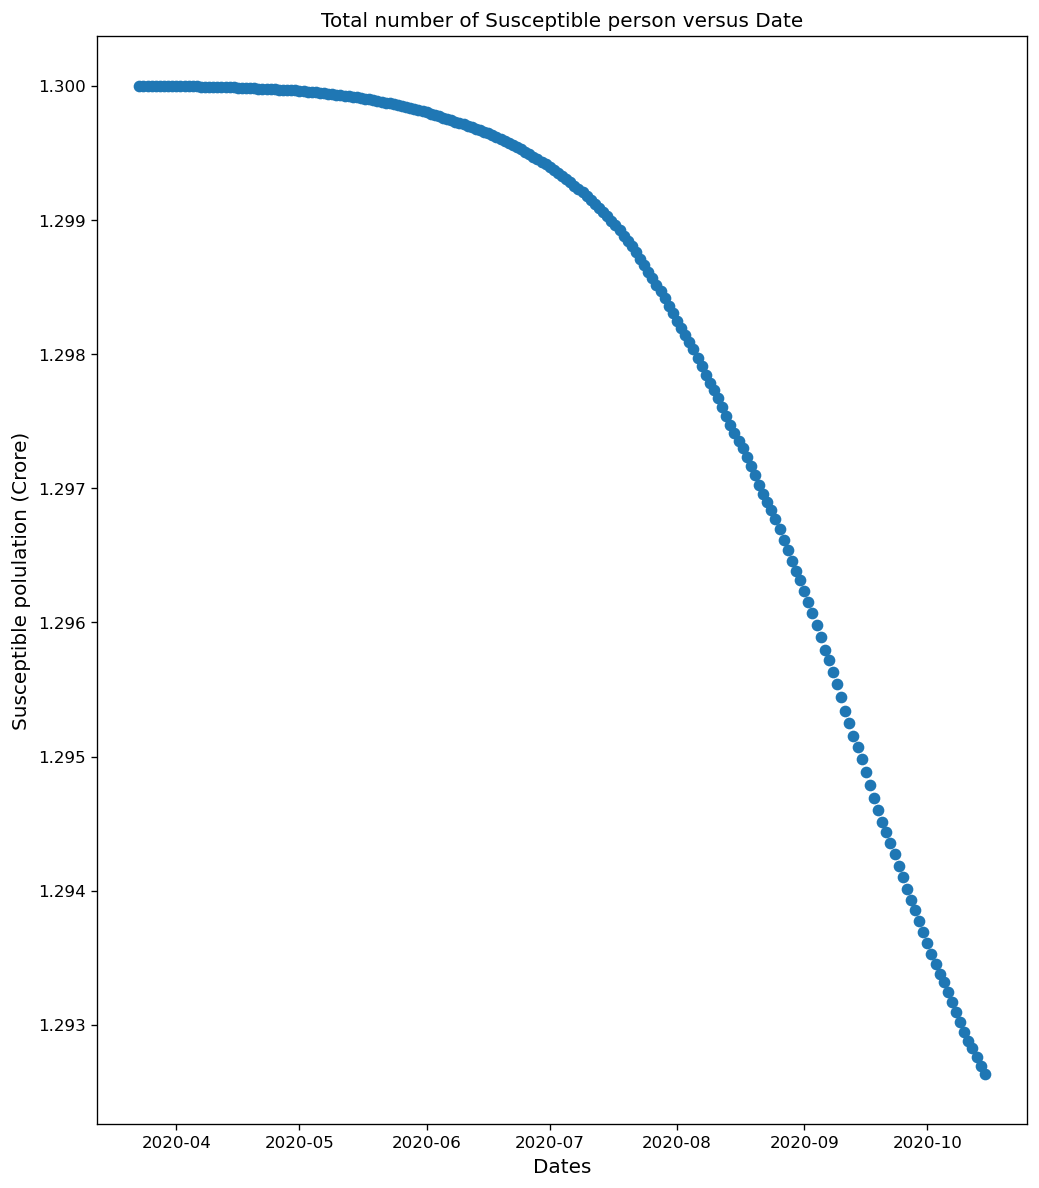

In [65]:
plt.title("Total number of Susceptible person versus Date")
plt.xlabel("Dates")
plt.ylabel("Susceptible polulation (Crore)")
#plt.scatter(dates, I,label='Susceptible')
#plt.scatter(dates,R,label="Recovered")
plt.scatter(dates,S/1e9,label="Susceptible")

# Box plot of total confimred COVID case in India from March 14th to Dec 4th

In [47]:
# total confirmed cases
confirmed_daily = raw_data.where(raw_data["Status"]=="Confirmed").dropna()
confirmed_daily

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,1.0,1.0,0.0,12.0,0.0,0.0,0.0
3,15-Mar-20,2020-03-15,Confirmed,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
6,16-Mar-20,2020-03-16,Confirmed,15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,17-Mar-20,2020-03-17,Confirmed,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
12,18-Mar-20,2020-03-18,Confirmed,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,1.0,8.0,0.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,30-Nov-20,2020-11-30,Confirmed,31179.0,6.0,381.0,13.0,159.0,457.0,67.0,...,553.0,2677.0,4.0,1410.0,593.0,54.0,2015.0,455.0,2671.0,0.0
786,01-Dec-20,2020-12-01,Confirmed,36474.0,8.0,685.0,14.0,222.0,482.0,128.0,...,618.0,2347.0,42.0,1404.0,502.0,31.0,1657.0,473.0,3315.0,0.0
789,02-Dec-20,2020-12-02,Confirmed,35506.0,5.0,663.0,24.0,173.0,680.0,105.0,...,599.0,1990.0,40.0,1428.0,565.0,38.0,1763.0,516.0,3271.0,0.0
792,03-Dec-20,2020-12-03,Confirmed,36574.0,6.0,664.0,28.0,165.0,571.0,75.0,...,756.0,2086.0,28.0,1416.0,609.0,39.0,1920.0,491.0,3246.0,0.0


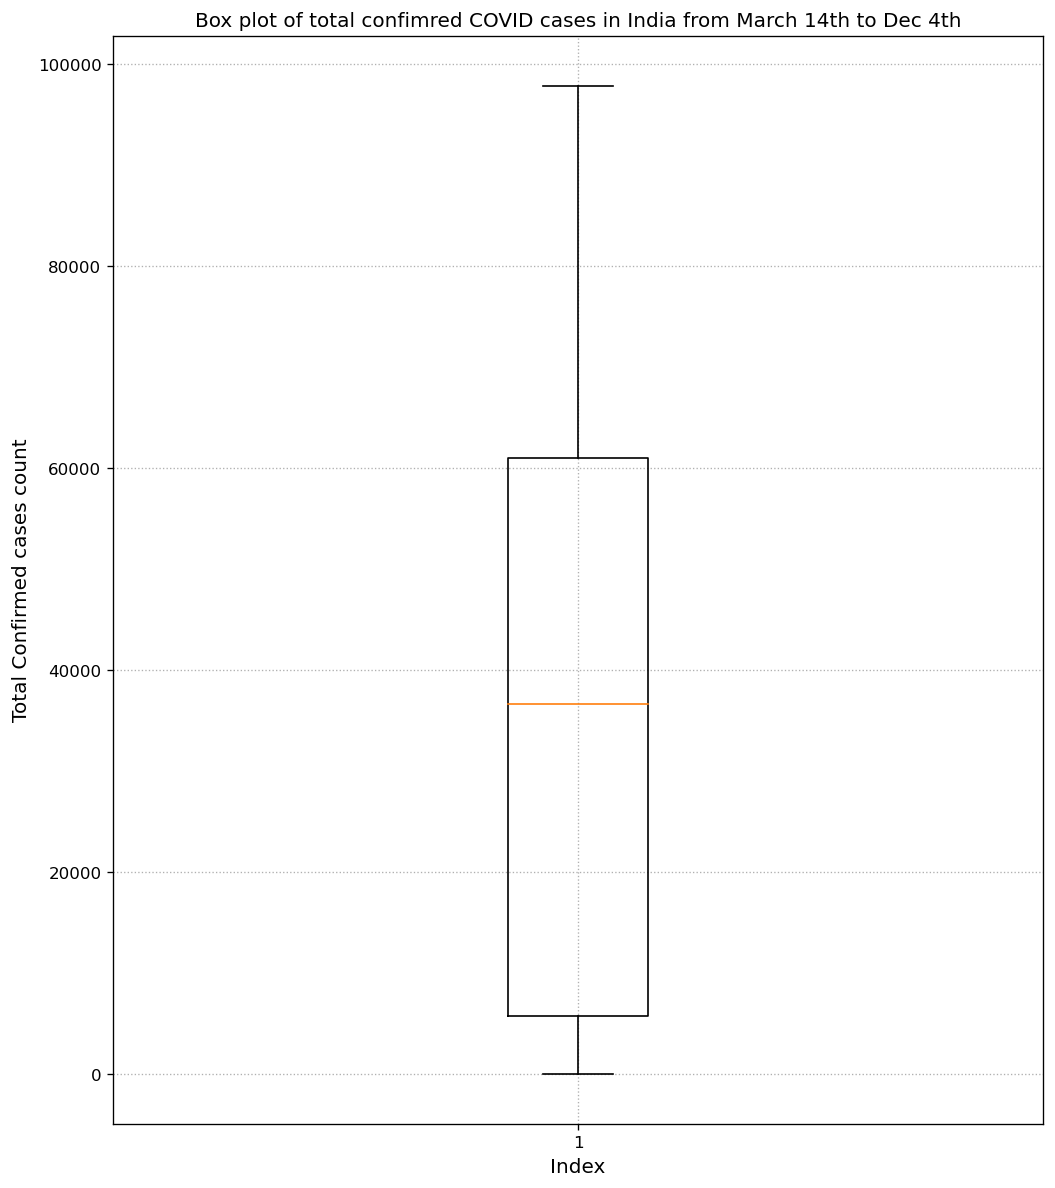

In [51]:
plt.ylabel('Total Confirmed cases count')
plt.xlabel("Index")
plt.title('Box plot of total confimred COVID cases in India from March 14th to Dec 4th')
plt.grid(linestyle='dotted')
plt.boxplot(confirmed_daily["TT"])
plt.savefig("total_confirmed_covid_cases_box_plot.png",dpi=300, format='png', bbox_inches='tight')
plt.show()

## Stacked bar plot of States/UTs with respect to Fund Released under National Afforestation Programme

In [6]:
NAP_data = pd.read_csv("NAP.csv")

In [7]:
NAP_data

,S. No.,State,2017-18,2018-19,2019-20
0,1,Andhra Pradesh,3.36,6.38,NaN
1,2,Bihar,4.23,0.00,NaN
2,3,Chhattisgarh,10.86,7.82,NaN
3,4,Goa,0.00,0.00,NaN
4,5,Gujarat,0.00,0.00,NaN
5,6,Haryana,2.71,0.00,NaN
6,7,Himachal Pradesh,1.73,2.92,NaN
7,8,Jammu & Kashmir,7.20,0.00,NaN
8,9,Jharkhand,0.00,0.00,NaN
9,10,Karnataka,3.24,10.99,NaN


In [15]:
sort_NAP = NAP_data.sort_values(['2018-19'],ascending=False)
print(sort_NAP.head(10))


,S. No.,State,2017-18,2018-19,2019-20
31,Grand Total,Grand Total,80.00,95.38,NaN
21,Other States,Total (Other States),57.71,69.50,NaN
30,North Eastern States,Total (NE States),22.29,25.88,NaN
12,13,Maharashtra,6.73,15.33,NaN
13,14,Odisha,3.49,11.36,NaN
9,10,Karnataka,3.24,10.99,NaN
2,3,Chhattisgarh,10.86,7.82,NaN
26,26,Mizoram,5.80,7.79,NaN
11,12,Madhya Pradesh,8.74,7.78,NaN
27,27,Nagaland,5.85,6.41,NaN


In [19]:
sort_NAP_top_10 = sort_NAP.iloc[3:13,:]
sort_NAP_top_10

,S. No.,State,2017-18,2018-19,2019-20
12,13,Maharashtra,6.73,15.33,NaN
13,14,Odisha,3.49,11.36,NaN
9,10,Karnataka,3.24,10.99,NaN
2,3,Chhattisgarh,10.86,7.82,NaN
26,26,Mizoram,5.80,7.79,NaN
11,12,Madhya Pradesh,8.74,7.78,NaN
27,27,Nagaland,5.85,6.41,NaN
0,1,Andhra Pradesh,3.36,6.38,NaN
28,28,Sikkim,0.00,5.98,NaN
24,24,Manipur,3.20,4.38,NaN


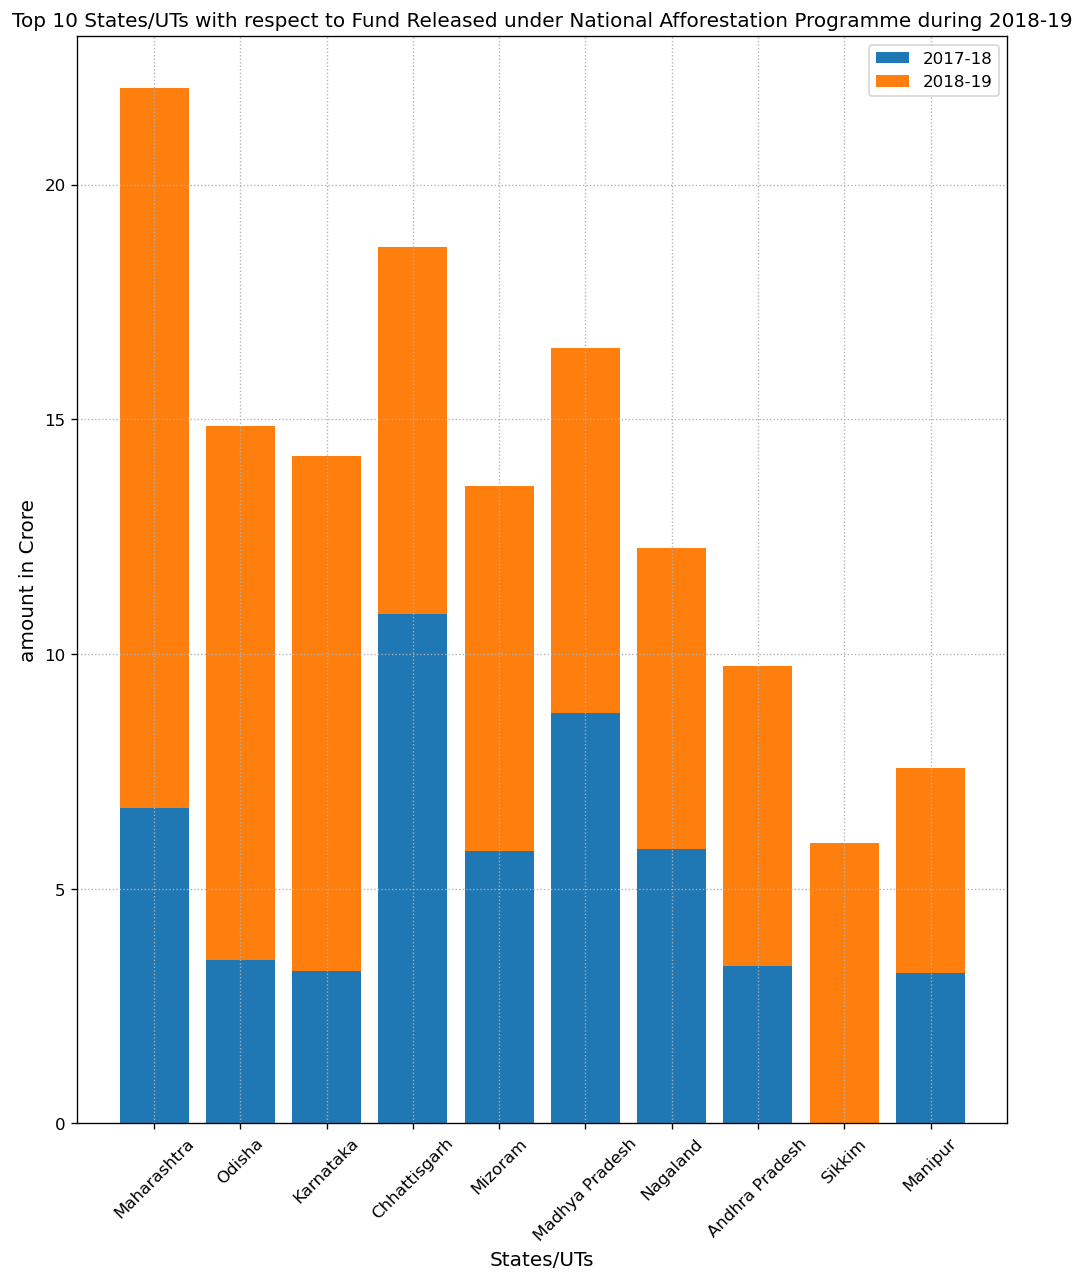

In [34]:
ind = sort_NAP_top_10['State'][0:10]
data_17_18 = sort_NAP_top_10["2017-18"][0:10]
data_18_19 = sort_NAP_top_10["2018-19"][0:10]
width = 0.8

p1 = plt.bar(ind, data_17_18, width)
p2 = plt.bar(ind, data_18_19, width,
             bottom=data_17_18)
plt.ylabel('amount in Crore')
plt.xlabel("States/UTs")
plt.title('Top 10 States/UTs with respect to Fund Released under National Afforestation Programme during 2018-19')
plt.xticks(rotation=45)
plt.legend((p1[0], p2[0]), ("2017-18", "2018-19"))
plt.grid(linestyle='dotted')
plt.savefig("top_10_NAP_stacke_bar_plot.png",dpi=300, format='png', bbox_inches='tight')
plt.show()